Running in Spain: Fad or trend?

Paremeters: 

ECONOMIC PARAMETERS
- Anual GDP and GDP per capita - 2000/2024 - datosmacro.com (scrapped web)
- Average anual income - 2008/2024 - INE.es (downloaded file)
- Anual unnenployment - 2002/2024 - INE.es (downloaded file)

SPECIFIC PARAMETERS
- Running races - 2004/2024 - runedia.com (scrapped web)
- Keywords searches in Google trends - 2004/2024 (scrapped web)

1. Data search and extraction

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time
from IPython.display import display

# Dictionaries to store the data
total_data = {"PIB_anual": {}, "PIB_capita": {}}

# Range of years to scrape
years = range(2000, 2025) 

# Loop through each year and scrape the data
for year in years:
    url = f"https://datosmacro.expansion.com/pib/espana-comunidades-autonomas?anio={year}"
    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Find all the tables
    tables = soup.find_all("table")
    
    # Scrape the first table (PIB anual)
    if len(tables) > 0:
        table_pib_anual = tables[0]
        for row in table_pib_anual.find_all("tr")[1:]: 
            cols = row.find_all("td")
            if len(cols) > 1:
                comunidad = cols[0].text.strip()
                pib_crudo = cols[2].text.strip()
                
                # Save the data in the dictionary
                if year not in total_data["PIB_anual"]:
                    total_data["PIB_anual"][year] = []
                total_data["PIB_anual"][year].append({
                    "CCAA": comunidad,
                    "PIB_anual": pib_crudo
                })
    
    # Scrape the second table (PIB per cápita)
    if len(tables) > 1:
        table_pib_per_capita = tables[1]
        for row in table_pib_per_capita.find_all("tr")[1:]:
            cols = row.find_all("td")
            if len(cols) > 1:
                comunidad = cols[0].text.strip()
                pib_per_capita = cols[2].text.strip()
                
                # Save the data in the dictionary
                if year not in total_data["PIB_capita"]:
                    total_data["PIB_capita"][year] = []
                total_data["PIB_capita"][year].append({
                    "CCAA": comunidad,
                    "PIB_capita": pib_per_capita
                })

# Convert the dictionaries to DataFrames
df_PIB_anual = pd.DataFrame([
    {"Año": year, **dato}
    for year, datos in total_data["PIB_anual"].items()
    for dato in datos
])

df_PIB_capita = pd.DataFrame([
    {"Año": year, **dato}
    for year, datos in total_data["PIB_capita"].items()
    for dato in datos
])

# Show the first 10 rows of each DataFrame
print("Head of anual GDP table")
display(df_PIB_anual.head(10))
print("Head of GDP per capita table")
display(df_PIB_capita.head(10))

Head of anual GDP table


,Año,CCAA,PIB_anual
0,2000,Andalucía [+],86.332 M€
1,2000,Aragón [+],20.043 M€
2,2000,Asturias [+],14.267 M€
3,2000,Cantabria [+],7.945 M€
4,2000,Ceuta [+],1.017 M€
5,2000,Castilla y León [+],35.646 M€
6,2000,Castilla-La Mancha [+],21.714 M€
7,2000,Canarias [+],25.962 M€
8,2000,Cataluña [+],122.057 M€
9,2000,Extremadura [+],10.745 M€


Head of GDP per capita table


,Año,CCAA,PIB_capita
0,2000,Andalucía [+],11.823 €
1,2000,Aragón [+],16.692 €
2,2000,Asturias [+],13.382 €
3,2000,Cantabria [+],14.891 €
4,2000,Ceuta [+],14.350 €
5,2000,Castilla y León [+],14.445 €
6,2000,Castilla-La Mancha [+],12.431 €
7,2000,Canarias [+],15.570 €
8,2000,Cataluña [+],19.383 €
9,2000,Extremadura [+],10.145 €


In [15]:
df_PIB_anual["CCAA"].unique()

array(['Andalucía [+]', 'Aragón [+]', 'Asturias [+]', 'Cantabria [+]',
       'Ceuta [+]', 'Castilla y León [+]', 'Castilla-La Mancha [+]',
       'Canarias [+]', 'Cataluña [+]', 'Extremadura [+]', 'Galicia [+]',
       'Islas Baleares [+]', 'Región de Murcia [+]',
       'Comunidad de Madrid [+]', 'Melilla [+]', 'Navarra [+]',
       'País Vasco [+]', 'La Rioja [+]', 'Comunidad Valenciana [+]'],
      dtype=object)

In [3]:
#Unify the dataframes
complete_df = pd.merge(df_PIB_anual, df_PIB_capita, on=["Año", "CCAA"], how="outer")
display(complete_df.head())

#Convert columns PIB_anual and PIB_capita to numeric values
complete_df["PIB_anual"] = (
    complete_df["PIB_anual"]
    .astype(str)
    .str.replace("\xa0", "")  # Clean the spaces
    .str.replace("M€", "")  # Remove the "M€" suffix
    .str.replace(",", ".")  # Replace comma with dot
    .astype(float)  # Convert to float
)

complete_df["PIB_capita"] = (
    complete_df["PIB_capita"]
    .astype(str)
    .str.replace("\xa0", "")  
    .str.replace("€", "")  
    .str.replace(",", ".") 
    .astype(float) 
)

print("Basic info of PIB table created:")
complete_df.info()


,Año,CCAA,PIB_anual,PIB_capita
0,2000,Andalucía [+],86.332 M€,11.823 €
1,2000,Aragón [+],20.043 M€,16.692 €
2,2000,Asturias [+],14.267 M€,13.382 €
3,2000,Canarias [+],25.962 M€,15.570 €
4,2000,Cantabria [+],7.945 M€,14.891 €


Basic info of PIB table created:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         475 non-null    int64  
 1   CCAA        475 non-null    object 
 2   PIB_anual   475 non-null    float64
 3   PIB_capita  475 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.0+ KB


In [ ]:
#Function to normalize CCAA names in all our dataframes
df_PIB_anual["CCAA"] = df_PIB_anual["CCAA"].replace({
    "Andalucía [+]": "Andalucia",
    "Aragón [+]": "Aragon",
    "Asturias [+]": "Asturias",
    "Canarias [+]": "Canarias", 
    "Cantabria [+]": "Cantabria",
    "Castilla y León [+]": "CastillaLeon",
    "Castilla-La Mancha [+]": "CastillaLaMancha",
    "Cataluña [+]": "Catalunya",
    "Ceuta [+]": "Ceuta",
    "Comunidad Valenciana [+]": "ComunidadValenciana",
    "Comunidad de Madrid [+]": "Madrid",
    "Extremadura [+]": "Extremadura",
    "Galicia [+]": "Galicia",
    "Islas Baleares [+]": "Baleares",
    "La Rioja [+]": "LaRioja",
    "Melilla [+]": "Melilla",
    "Navarra [+]": "Navarra",
    "País Vasco [+]": "PaisVasco",
    "Región de Murcia [+]": "Murcia",
    "Total Nacional" : "Total_Nacional"
})

In [4]:
# Clean the "CCAA" column values
complete_df["CCAA"].unique()

#Modificar los nombres de las comunidades autónomas para que sean más legibles
complete_df["CCAA"] = complete_df["CCAA"].replace({
    "Andalucía [+]": "Andalucia",
    "Aragón [+]": "Aragon",
    "Asturias [+]": "Asturias",
    "Canarias [+]": "Canarias", 
    "Cantabria [+]": "Cantabria",
    "Castilla y León [+]": "CastillaLeon",
    "Castilla-La Mancha [+]": "CastillaLaMancha",
    "Cataluña [+]": "Catalunya",
    "Ceuta [+]": "Ceuta",
    "Comunidad Valenciana [+]": "ComunidadValenciana",
    "Comunidad de Madrid [+]": "Madrid",
    "Extremadura [+]": "Extremadura",
    "Galicia [+]": "Galicia",
    "Islas Baleares [+]": "Baleares",
    "La Rioja [+]": "LaRioja",
    "Melilla [+]": "Melilla",
    "Navarra [+]": "Navarra",
    "País Vasco [+]": "PaisVasco",
    "Región de Murcia [+]": "Murcia",
})

print("Sample values:")
display(complete_df.sample(15))

Sample values:


,Año,CCAA,PIB_anual,PIB_capita
257,2013,Madrid,193.345,30.264
370,2019,ComunidadValenciana,116.589,23.248
361,2019,Andalucia,166.479,19.744
214,2011,CastillaLeon,54.329,21.378
221,2011,Galicia,55.817,20.139
381,2020,Aragon,35.956,27.003
184,2009,Baleares,26.770,24.832
99,2005,Cantabria,11.149,19.981
343,2018,Aragon,37.214,28.281
339,2017,Navarra,19.699,30.631


In [5]:
#Save the DataFrame to a CSV file
complete_df.to_csv(r"C:\Users\evaru\Downloads\EVOLVE\python\running-trends\data\running-trends-dataset.csv", index=False, sep=";")

Now, we are going to charge renta data to clean and join to our dataset

In [6]:
#Load the data
import pandas as pd
renta_df = pd.read_csv(r"C:\Users\evaru\Downloads\EVOLVE\python\running-trends\data\raw\RentaESP-ccaa.csv", sep=";")

renta_df.info()
display(renta_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 4 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Comunidades y Ciudades Autónomas                            1360 non-null   object 
 1   Renta anual neta media por persona y por unidad de consumo  1360 non-null   object 
 2   Periodo                                                     1360 non-null   int64  
 3   Total                                                       1360 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 42.6+ KB


,Comunidades y Ciudades Autónomas,Renta anual neta media por persona y por unidad de consumo,Periodo,Total
0,Total Nacional,Renta neta media por persona,2024,14.807
1,Total Nacional,Renta neta media por persona,2023,14.082
2,Total Nacional,Renta neta media por persona,2022,13.008
3,Total Nacional,Renta neta media por persona,2021,12.269
4,Total Nacional,Renta neta media por persona,2020,12.292


In [7]:
renta_df.iloc[:, 1].unique()

array(['Renta neta media por persona',
       'Renta media por unidad de consumo',
       'Renta media por persona (con alquiler imputado)',
       'Renta media por unidad de consumo (con alquiler imputado)'],
      dtype=object)

In [8]:
# 1. Pivotar el DataFrame para transformar los tipos de renta en columnas
pivoted_renta_df = renta_df.pivot(
    index=["Periodo", "Comunidades y Ciudades Autónomas"], 
    columns="Renta anual neta media por persona y por unidad de consumo",
    values="Total"
).reset_index()

# 2. Renombrar la columna de comunidades para simplificar los nombres
pivoted_renta_df["Comunidades y Ciudades Autónomas"] = pivoted_renta_df["Comunidades y Ciudades Autónomas"].replace({
    "01 Andalucía": "Andalucia",
    "02 Aragón": "Aragon",
    "03 Asturias, Principado de": "Asturias",
    "05 Canarias": "Canarias", 
    "06 Cantabria": "Cantabria",
    "07 Castilla y León": "CastillaLeon",
    "08 Castilla - La Mancha": "CastillaLaMancha",
    "09 Cataluña": "Catalunya",
    "18 Ceuta": "Ceuta",
    "10 Comunitat Valenciana": "ComunidadValenciana",
    "13 Madrid, Comunidad de": "Madrid",
    "11 Extremadura": "Extremadura",
    "12 Galicia": "Galicia",
    "04 Balears, Illes": "Baleares",
    "17 Rioja, La": "LaRioja",
    "19 Melilla": "Melilla",
    "15 Navarra, Comunidad Foral de": "Navarra",
    "16 País Vasco": "PaisVasco",
    "14 Murcia, Región de": "Murcia",
    "Total Nacional" : "Total_Nacional"
})

# 3. Ordenar por año (columna 'Periodo')
pivoted_renta_df = pivoted_renta_df.sort_values(by="Periodo", ascending=False)

# 4. Mostrar el resultado
display(pivoted_renta_df.head())


Renta anual neta media por persona y por unidad de consumo,Periodo,Comunidades y Ciudades Autónomas,Renta media por persona (con alquiler imputado),Renta media por unidad de consumo,Renta media por unidad de consumo (con alquiler imputado),Renta neta media por persona
339,2024,Total_Nacional,16.917,21.759,24.666,14.807
329,2024,ComunidadValenciana,15.523,19.574,22.532,13.374
320,2024,Andalucia,14.276,17.990,20.896,12.191
321,2024,Aragon,17.916,22.875,25.808,15.747
322,2024,Asturias,18.597,22.774,25.954,16.201


In [9]:
# Renombrar las columnas de pivoted_renta_df para que coincidan con las de complete_df
pivoted_renta_df = pivoted_renta_df.rename(columns={
    "Periodo": "Año",
    "Comunidades y Ciudades Autónomas": "CCAA"
})

# Hacer el merge de los DataFrames
complete_df = pd.merge(complete_df, pivoted_renta_df, on=["Año", "CCAA"], how="left")

# Mostrar las primeras filas del DataFrame combinado
display(complete_df.sample(10))

,Año,CCAA,PIB_anual,PIB_capita,Renta media por persona (con alquiler imputado),Renta media por unidad de consumo,Renta media por unidad de consumo (con alquiler imputado),Renta neta media por persona
25,2001,CastillaLaMancha,24.300,13.834,NaN,NaN,NaN,NaN
437,2023,Andalucia,199.952,23.218,13.733,17.295,20.114,11.719
451,2023,LaRioja,10.618,32.828,16.332,20.687,23.613,14.184
387,2020,Catalunya,214.857,27.796,16.105,20.872,23.576,14.170
440,2023,Canarias,54.194,24.345,14.050,17.940,20.537,12.177
346,2018,Cantabria,13.844,23.818,13.166,16.400,19.051,11.239
396,2020,Navarra,19.161,28.987,17.017,22.391,25.077,15.094
204,2010,LaRioja,8.009,25.035,12.388,15.769,18.010,10.756
134,2007,Aragon,34.149,26.080,NaN,NaN,NaN,NaN
282,2014,Navarra,17.642,27.704,14.862,19.550,21.814,13.221


In [10]:
# Clean the data from "Tasa paro ESP file"
# Load the data
import pandas as pd
unemployment_df = pd.read_csv(r"C:\Users\evaru\Downloads\EVOLVE\python\running-trends\data\raw\TasaParoESP-ccaa.csv", sep=";")

unemployment_df.info()
display(unemployment_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38640 entries, 0 to 38639
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Sexo                              38640 non-null  object
 1   Comunidades y Ciudades Autónomas  38640 non-null  object
 2   Edad                              38640 non-null  object
 3   Periodo                           38640 non-null  object
 4   Total                             38640 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total
0,Ambos sexos,Total Nacional,Total,2024T4,"10,61"
1,Ambos sexos,Total Nacional,Total,2024T3,"11,21"
2,Ambos sexos,Total Nacional,Total,2024T2,"11,27"
3,Ambos sexos,Total Nacional,Total,2024T1,"12,29"
4,Ambos sexos,Total Nacional,Total,2023T4,"11,8"


In [11]:
# Clean the data
column_ordered = ['Periodo', 'Comunidades y Ciudades Autónomas', 'Total', 'Edad', 'Sexo']
unemployment_df = unemployment_df[column_ordered]
unemployment_df['Periodo'] = unemployment_df['Periodo'].astype(str).str[:4]
unemployment_df = unemployment_df[unemployment_df['Sexo'] == 'Ambos sexos']
unemployment_df = unemployment_df[unemployment_df['Edad'] == 'Total']
unemployment_df['Total'] = unemployment_df['Total'].astype(str).str.replace(',', '.').astype(float)
unemployment_df = unemployment_df.rename(columns={'Comunidades y Ciudades Autónomas' : 'CCAA',
              "Periodo": "Año",
              "Total" : "Paro"}
    ) 

In [12]:
unemployment_df['CCAA'].unique()

array(['Total Nacional', '01 Andalucía', '02 Aragón',
       '03 Asturias, Principado de', '04 Balears, Illes', '05 Canarias',
       '06 Cantabria', '07 Castilla y León', '08 Castilla - La Mancha',
       '09 Cataluña', '10 Comunitat Valenciana', '11 Extremadura',
       '12 Galicia', '13 Madrid, Comunidad de', '14 Murcia, Región de',
       '15 Navarra, Comunidad Foral de', '16 País Vasco', '17 Rioja, La',
       '18 Ceuta', '19 Melilla'], dtype=object)

In [13]:
unemployment_df["CCAA"].replace({
    "01 Andalucía": "Andalucia",
    "02 Aragón": "Aragon",
    "03 Asturias, Principado de": "Asturias",
    "05 Canarias": "Canarias", 
    "06 Cantabria": "Cantabria",
    "07 Castilla y León": "CastillaLeon",
    "08 Castilla - La Mancha": "CastillaLaMancha",
    "09 Cataluña": "Catalunya",
    "18 Ceuta": "Ceuta",
    "10 Comunitat Valenciana": "ComunidadValenciana",
    "13 Madrid, Comunidad de": "Madrid",
    "11 Extremadura": "Extremadura",
    "12 Galicia": "Galicia",
    "04 Balears, Illes": "Baleares",
    "17 Rioja, La": "LaRioja",
    "19 Melilla": "Melilla",
    "15 Navarra, Comunidad Foral de": "Navarra",
    "16 País Vasco": "PaisVasco",
    "14 Murcia, Región de": "Murcia",
    "Total Nacional" : "Total_Nacional"
})

unemployment_df.groupby(['Año', 'CCAA'])['Total'].sum().reset_index()
#Show the result
print(unemployment_df)

KeyError: 'Column not found: Total'

In [14]:
# Comprobar si los valores de la columna "Año" son iguales en ambos DataFrames
años_iguales = set(complete_df["Año"]) == set(unemployment_df["Año"])
print(f"¿Los valores de la columna 'Año' son iguales en ambos DataFrames? {años_iguales}")

# Comprobar si los valores de la columna "CCAA" son iguales en ambos DataFrames
ccaa_iguales = set(complete_df["CCAA"]) == set(unemployment_df["CCAA"])
print(f"¿Los valores de la columna 'CCAA' son iguales en ambos DataFrames? {ccaa_iguales}")

¿Los valores de la columna 'Año' son iguales en ambos DataFrames? False
¿Los valores de la columna 'CCAA' son iguales en ambos DataFrames? False


In [ ]:
# Hacer el merge de los DataFrames
complete_df = pd.merge(complete_df, unemployment_df, on=["Año", "CCAA"], how="left")

# Mostrar las primeras filas del DataFrame combinado
display(complete_df.sample(30))

,Año,CCAA,PIB_anual,PIB_capita,Renta media por persona (con alquiler imputado),Renta media por unidad de consumo,Renta media por unidad de consumo (con alquiler imputado),Renta neta media por persona,Total,Edad,Sexo
435,2022,PaisVasco,80.481,36.421,18.899,23.886,27.288,16.427,NaN,NaN,NaN
24,2001,CastillaLeon,37.940,15.429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,2017,Melilla,1.467,17.051,11.601,16.453,18.686,10.161,NaN,NaN,NaN
13,2000,Baleares,16.493,20.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,2010,Andalucia,145.854,17.567,10.845,14.152,16.393,9.293,NaN,NaN,NaN
235,2012,Catalunya,194.513,25.937,13.708,18.136,20.228,12.199,NaN,NaN,NaN
411,2021,Galicia,64.387,23.927,13.465,16.785,19.565,11.453,NaN,NaN,NaN
192,2010,Asturias,22.591,20.992,14.443,18.377,20.937,12.589,NaN,NaN,NaN
325,2017,Asturias,22.538,21.897,14.157,17.547,20.162,12.244,NaN,NaN,NaN
456,2024,Andalucia,199.952,23.218,14.276,17.990,20.896,12.191,NaN,NaN,NaN


In [ ]:
display(complete_df.sample(30))

,Año,CCAA,PIB_anual,PIB_capita,Renta media por persona (con alquiler imputado),Renta media por unidad de consumo,Renta media por unidad de consumo (con alquiler imputado),Renta neta media por persona,Total,Edad,Sexo
169,2008,PaisVasco,66.382,30.636,15.886,20.887,23.517,14.038,NaN,NaN,NaN
431,2022,Baleares,37.165,30.997,14.303,18.576,21.197,12.451,NaN,NaN,NaN
397,2020,PaisVasco,66.673,30.115,18.091,23.174,26.340,15.813,NaN,NaN,NaN
49,2002,Extremadura,12.697,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Ceuta,1.017,14.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,2020,Baleares,26.669,22.611,14.303,18.787,21.103,12.658,NaN,NaN,NaN
382,2020,Asturias,21.376,21.069,14.833,18.028,20.787,12.786,NaN,NaN,NaN
311,2016,Catalunya,214.503,28.781,14.299,18.828,21.108,12.660,NaN,NaN,NaN
391,2020,Extremadura,19.497,18.351,10.879,13.297,15.697,9.147,NaN,NaN,NaN
330,2017,Catalunya,223.140,29.770,14.481,18.957,21.429,12.712,NaN,NaN,NaN


In [57]:
import os
import pandas as pd

# Ruta de la carpeta que contiene los archivos CSV
carpeta_csv = r"C:\Users\evaru\Downloads\EVOLVE\python\running-trends\data\raw\google-trends"

# Iterar sobre todos los archivos en la carpeta
for archivo in os.listdir(carpeta_csv):
    if archivo.endswith(".csv"):  # Verificar si el archivo es un CSV
        ruta_completa = os.path.join(carpeta_csv, archivo)
        df = pd.read_csv(ruta_completa, sep=",")  # Leer el archivo CSV
        
        # Crear un DataFrame para cada archivo CSV
        nombre_df = f"df_{os.path.splitext(archivo)[0]}"  # Nombre del DataFrame basado en el nombre del archivo
        globals()[nombre_df] = df  # Crear el DataFrame dinámicamente
        print(f"Se ha creado el dataframe {nombre_df}")


Se ha creado el dataframe df_2004
Se ha creado el dataframe df_2005
Se ha creado el dataframe df_2006
Se ha creado el dataframe df_2007
Se ha creado el dataframe df_2008
Se ha creado el dataframe df_2009
Se ha creado el dataframe df_2010
Se ha creado el dataframe df_2011
Se ha creado el dataframe df_2012
Se ha creado el dataframe df_2013
Se ha creado el dataframe df_2014
Se ha creado el dataframe df_2015
Se ha creado el dataframe df_2016
Se ha creado el dataframe df_2017
Se ha creado el dataframe df_2018
Se ha creado el dataframe df_2019
Se ha creado el dataframe df_2020
Se ha creado el dataframe df_2021
Se ha creado el dataframe df_2022
Se ha creado el dataframe df_2023
Se ha creado el dataframe df_2024


In [58]:
df_2004.info()
display(df_2004.head())

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Región to La Rioja
Data columns (total 1 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Categoría: Todas las categorías  8 non-null      object
dtypes: object(1)
memory usage: 320.0+ bytes


,Categoría: Todas las categorías
Región,running: (2004)
Galicia,100
Castilla y León,82
Cataluña,76
País Vasco,68


In [ ]:
# Rango de años
for year in range(2004, 2025):
    df = globals()[f"df_{year}"]  # Accede al DataFrame por su nombre
    df = df.reset_index()  # Convierte el índice ("Región") en columna
    df.columns = ['Región', 'Busqueda_running']  # Renombra columnas
    globals()[f"df_{year}"] = df  # Sobrescribe el DataFrame con el nuevo formato

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [62]:
# Creamos una lista para almacenar todos los DataFrames
dfs = []

# Recorremos todos los años
for year in range(2004, 2025):
    df = globals()[f"df_{year}"].copy()
    df["Año"] = year  # Añadimos columna del año
    dfs.append(df)

# Concatenamos todos en un único DataFrame
df_running_completo = pd.concat(dfs, ignore_index=True)

# Mostramos una muestra
print("Muestra del DataFrame combinado:")
display(df_running_completo)


Muestra del DataFrame combinado:


,Región,Busqueda_running,Año
0,Región,running: (2004),2004
1,Galicia,100,2004
2,Castilla y León,82,2004
3,Cataluña,76,2004
4,País Vasco,68,2004
...,...,...,...
415,Castilla y León,72,2024
416,Galicia,66,2024
417,Canarias,66,2024
418,Ceuta,61,2024


In [65]:
# Paso 1: Renombramos la columna de búsquedas (si no lo está ya)
df_running_completo = df_running_completo.rename(columns={
    df_running_completo.columns[1]: "Busqueda_running"
})

# Paso 2: Pivotamos para convertir los años en columnas
df_running_pivot = df_running_completo.pivot(
    index="Región",
    columns="Año",
    values="Busqueda_running"
)

# Paso 3: Renombramos las columnas para que digan "busquedas_2004", etc.
df_running_pivot.columns = [f"busquedas_{col}" for col in df_running_pivot.columns]

# Paso 4: Reiniciamos índice si quieres que "Región" sea columna y no índice
df_running_pivot = df_running_pivot.reset_index()

# Muestra
print("Tabla final con búsquedas por año:")
display(df_running_pivot)


Tabla final con búsquedas por año:


,Región,busquedas_2004,busquedas_2005,busquedas_2006,busquedas_2007,busquedas_2008,busquedas_2009,busquedas_2010,busquedas_2011,busquedas_2012,...,busquedas_2015,busquedas_2016,busquedas_2017,busquedas_2018,busquedas_2019,busquedas_2020,busquedas_2021,busquedas_2022,busquedas_2023,busquedas_2024
0,Andalucía,66,71,34,71,69,58,38,61,49,...,71,68,79,82,89,83,79,83,80,84
1,Aragón,NaN,NaN,46,63,60,86,53,83,68,...,95,100,92,87,94,80,85,96,83,87
2,Canarias,NaN,88,28,51,65,46,32,62,51,...,60,59,63,64,74,62,54,63,61,66
3,Cantabria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,64,...,72,66,72,66,74,67,69,68,67,73
4,Castilla y León,82,NaN,44,77,73,73,45,61,54,...,73,69,74,65,80,72,76,74,68,72
5,Castilla-La Mancha,NaN,NaN,NaN,NaN,NaN,76,39,67,54,...,76,76,76,73,85,81,82,78,81,81
6,Cataluña,76,90,52,100,84,76,47,91,100,...,82,75,83,82,91,85,90,87,80,91
7,Ceuta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70,75,88,74,89,57,71,73,67,61
8,Comunidad Valenciana,60,69,44,88,100,74,50,100,82,...,95,92,89,90,100,80,88,84,90,93
9,Comunidad de Madrid,66,62,38,92,76,61,41,77,67,...,75,76,79,73,92,84,100,100,100,100


In [66]:
df_running_pivot["Región"].unique()

array(['Andalucía', 'Aragón', 'Canarias', 'Cantabria', 'Castilla y León',
       'Castilla-La Mancha', 'Cataluña', 'Ceuta', 'Comunidad Valenciana',
       'Comunidad de Madrid', 'Extremadura', 'Galicia', 'Islas Baleares',
       'La Rioja', 'Melilla', 'Navarra', 'País Vasco',
       'Principado de Asturias', 'Región de Murcia'], dtype=object)

✅ Graphic saved: img1


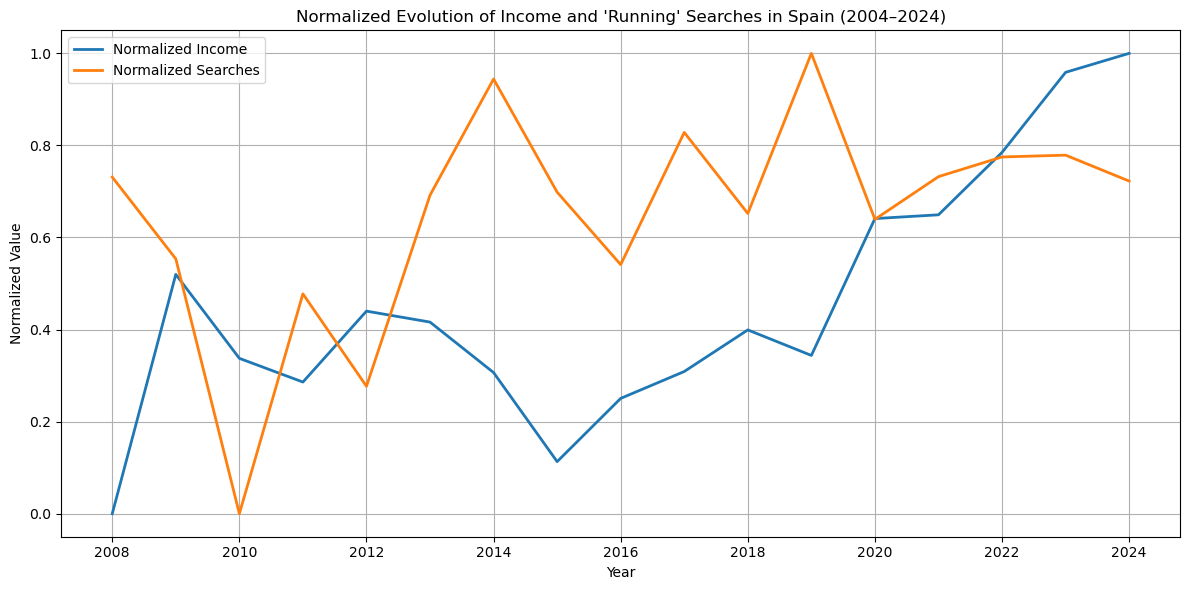

✅ Graphic saved: img2


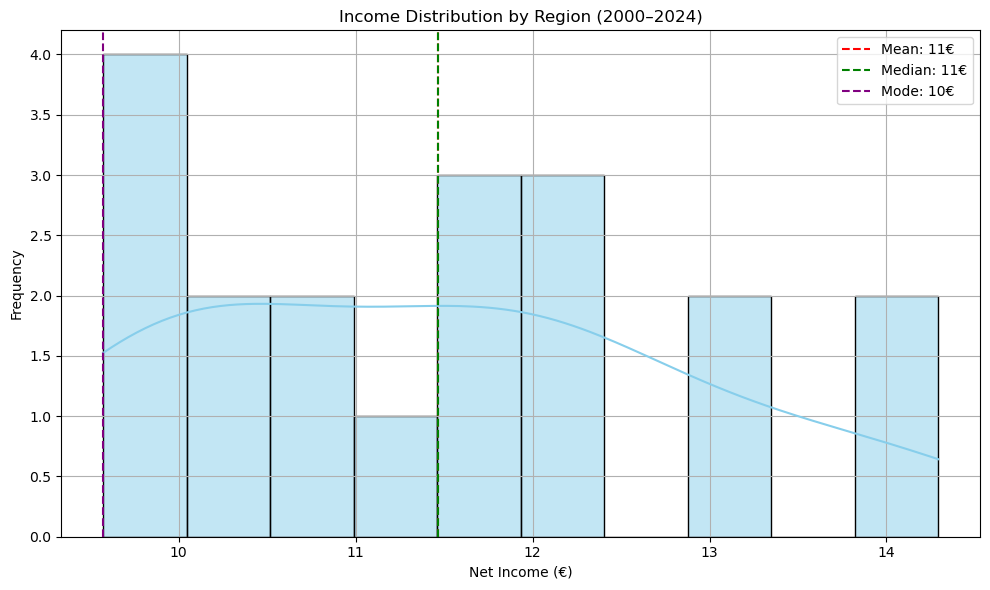


📈 Pearson Correlation: Income vs Running
Correlation: 0.07, p-value: 0.7672
⚠️ Not significant
✅ Graphic saved: img4


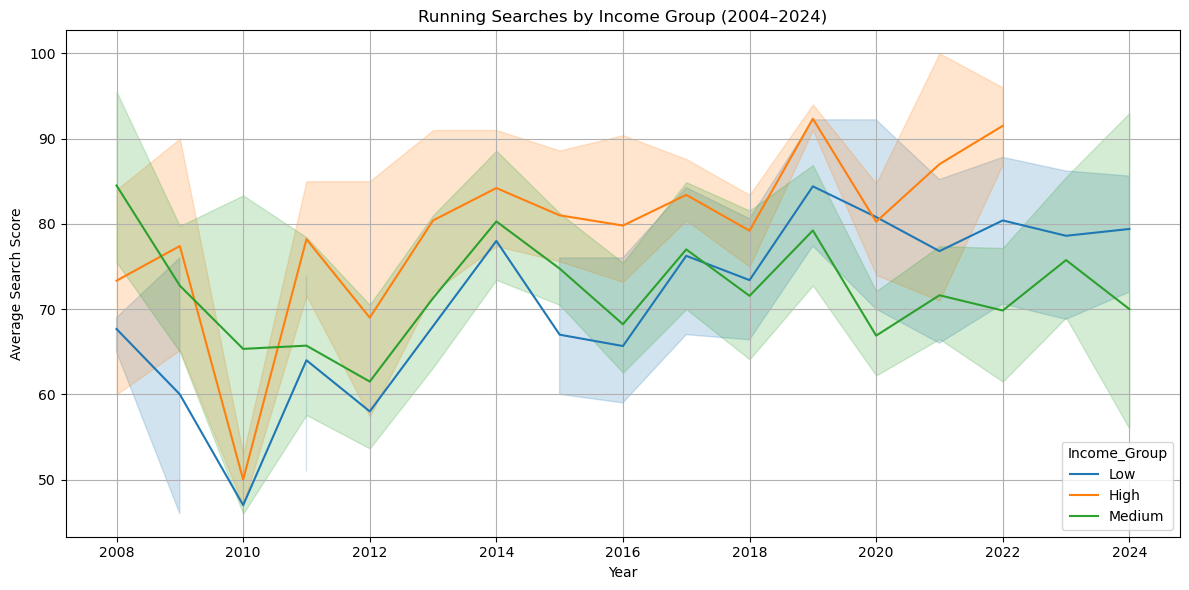

✅ Graphic saved: img5


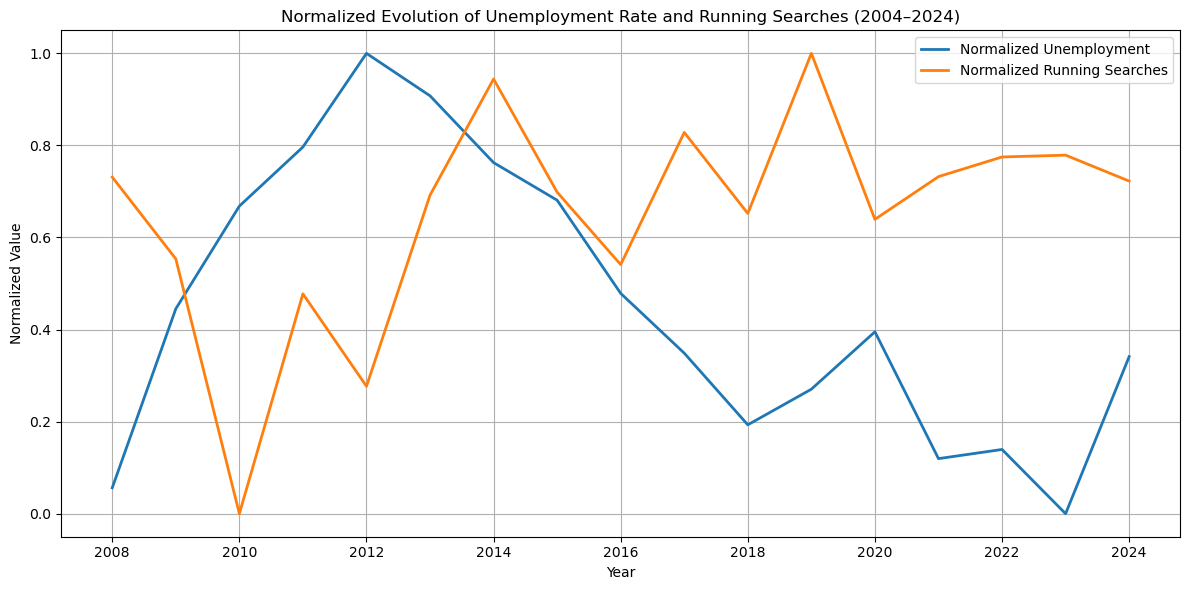


📊 Unemployment Statistics (2000–2024)
Mean: 17.28%
Median: 15.99%
Mode: 12.51%
Q1: 14.49%
Q3: 19.67%

📉 Pearson Correlation: Unemployment vs Running Searches
Correlation: 0.04, p-value: 0.8619
⚠️ Not significant
✅ Graphic saved: img8


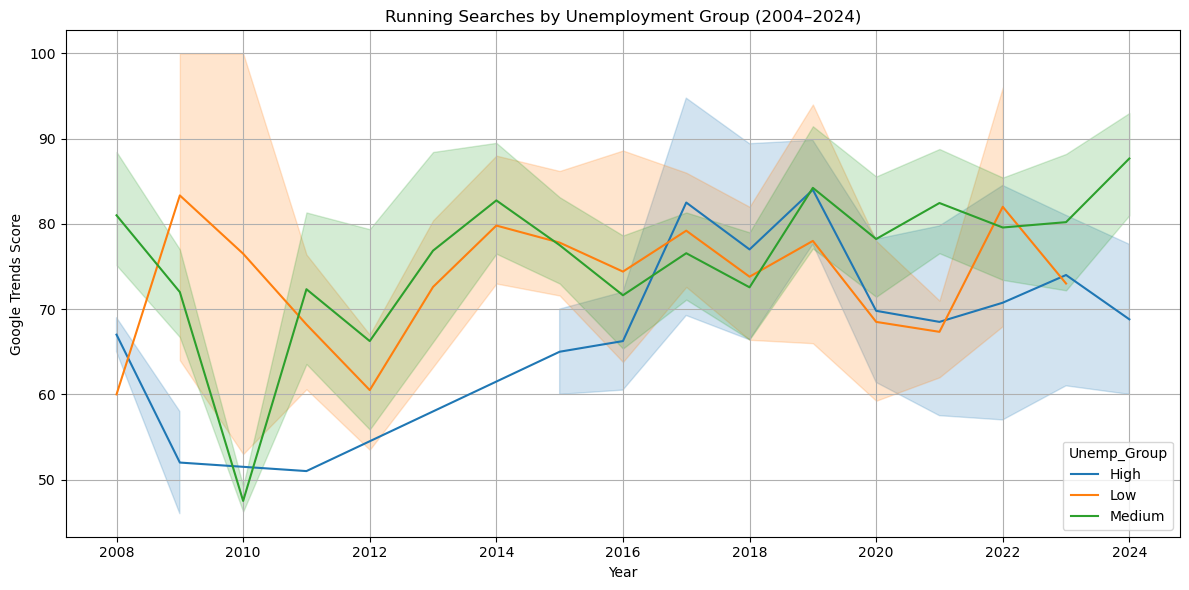

✅ CSV with group classification and cleaned data saved to:
C:\Users\evaru\Downloads\EVOLVE\python\running-trends\data\processed\running_trends_cleaned_for_powerbi.csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

# === Load dataset ===
df = pd.read_csv(r"C:\Users\evaru\Downloads\EVOLVE\python\running-trends\data\running-trends-dataset.csv", sep=";")
df = df.drop_duplicates(subset=["Año", "CCAA"])

# === REMOVE OUTLIERS for robustness (based on 5%–95% percentiles) ===
def remove_outliers(df, column):
    p5 = df[column].quantile(0.05)
    p95 = df[column].quantile(0.95)
    return df[(df[column] >= p5) & (df[column] <= p95)]

df = remove_outliers(df, "Renta neta media por persona")
df = remove_outliers(df, "Total_paro")
df = remove_outliers(df, "busquedas_running")

# === H1: Communities with greater purchasing power are more interested in running ===
# 1. Normalized evolution of income and searches
evolution = df.groupby("Año")[["Renta neta media por persona", "busquedas_running"]].mean().dropna()
scaler = MinMaxScaler()
evolution[["Renta neta media por persona", "busquedas_running"]] = scaler.fit_transform(evolution)

plt.figure(figsize=(12, 6))
sns.lineplot(data=evolution, x=evolution.index, y="Renta neta media por persona", label="Normalized Income", linewidth=2)
sns.lineplot(data=evolution, x=evolution.index, y="busquedas_running", label="Normalized Searches", linewidth=2)
plt.title("Normalized Evolution of Income and 'Running' Searches in Spain (2004–2024)")
plt.xlabel("Year")
plt.ylabel("Normalized Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(r"C:\Users\evaru\Downloads\EVOLVE\python\running-trends\images\img1.png", dpi=300, bbox_inches='tight')
print("✅ Graphic saved: img1")
plt.show()

# 2. Distribution of average income per region
mean_income = df.groupby("CCAA", as_index=False)["Renta neta media por persona"].mean()
mean_val = mean_income["Renta neta media por persona"].mean()
median = mean_income["Renta neta media por persona"].median()
mode = mean_income["Renta neta media por persona"].mode()[0]

plt.figure(figsize=(10, 6))
sns.histplot(mean_income["Renta neta media por persona"], bins=10, kde=True, color='skyblue')
plt.axvline(mean_val, color='red', linestyle='--', label=f"Mean: {mean_val:.0f}€")
plt.axvline(median, color='green', linestyle='--', label=f"Median: {median:.0f}€")
plt.axvline(mode, color='purple', linestyle='--', label=f"Mode: {mode:.0f}€")
plt.title("Income Distribution by Region (2000–2024)")
plt.xlabel("Net Income (€)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\evaru\Downloads\EVOLVE\python\running-trends\images\img2.png", dpi=300, bbox_inches='tight')
print("✅ Graphic saved: img2")
plt.show()

# 3. Group regions by income
q1 = mean_income["Renta neta media por persona"].quantile(0.25)
q3 = mean_income["Renta neta media por persona"].quantile(0.75)

def classify_income(val):
    if val < q1:
        return "Low"
    elif val > q3:
        return "High"
    else:
        return "Medium"

mean_income["Income_Group"] = mean_income["Renta neta media por persona"].apply(classify_income)

# 4. Group regions by search score
mean_search = df.groupby("CCAA", as_index=False)["busquedas_running"].mean()
q1_s = mean_search["busquedas_running"].quantile(0.25)
q3_s = mean_search["busquedas_running"].quantile(0.75)

def classify_search(val):
    if val < q1_s:
        return "Low"
    elif val > q3_s:
        return "High"
    else:
        return "Medium"

mean_search["Search_Group"] = mean_search["busquedas_running"].apply(classify_search)

# 5. Merge both
merged = pd.merge(mean_income, mean_search, on="CCAA")

# 6. Correlation between income and searches
corr, p_val = pearsonr(merged["Renta neta media por persona"], merged["busquedas_running"])
print("\n📈 Pearson Correlation: Income vs Running")
print(f"Correlation: {corr:.2f}, p-value: {p_val:.4f}")
print("✅ Significant" if p_val < 0.05 else "⚠️ Not significant")

# 7. Evolution by group
income_group_df = df.merge(mean_income[["CCAA", "Income_Group"]], on="CCAA")

plt.figure(figsize=(12, 6))
sns.lineplot(data=income_group_df, x="Año", y="busquedas_running", hue="Income_Group", estimator="mean")
plt.title("Running Searches by Income Group (2004–2024)")
plt.xlabel("Year")
plt.ylabel("Average Search Score")
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\evaru\Downloads\EVOLVE\python\running-trends\images\img4.png", dpi=300, bbox_inches='tight')
print("✅ Graphic saved: img4")
plt.show()

# === H2: Communities with the highest unemployment are less interested in running ===
# 1. Normalized evolution of unemployment rate and running searches
unemp_evolution = df.groupby("Año")[["Total_paro", "busquedas_running"]].mean().dropna()
scaler = MinMaxScaler()
unemp_evolution[["Total_paro", "busquedas_running"]] = scaler.fit_transform(unemp_evolution)

plt.figure(figsize=(12, 6))
sns.lineplot(data=unemp_evolution, x=unemp_evolution.index, y="Total_paro", label="Normalized Unemployment", linewidth=2)
sns.lineplot(data=unemp_evolution, x=unemp_evolution.index, y="busquedas_running", label="Normalized Running Searches", linewidth=2)
plt.title("Normalized Evolution of Unemployment Rate and Running Searches (2004–2024)")
plt.xlabel("Year")
plt.ylabel("Normalized Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(r"C:\Users\evaru\Downloads\EVOLVE\python\running-trends\images\img5.png", dpi=300, bbox_inches='tight')
print("✅ Graphic saved: img5")
plt.show()

# 2. Distribution of average unemployment rate by region
mean_unemp_stats = df.groupby("CCAA", as_index=False)["Total_paro"].mean()
mean_val_unemp = mean_unemp_stats["Total_paro"].mean()
median_unemp = mean_unemp_stats["Total_paro"].median()
mode_unemp = mean_unemp_stats["Total_paro"].mode()[0]
q1_unemp = mean_unemp_stats["Total_paro"].quantile(0.25)
q3_unemp = mean_unemp_stats["Total_paro"].quantile(0.75)

# Print stats
print("\n📊 Unemployment Statistics (2000–2024)")
print(f"Mean: {mean_val_unemp:.2f}%")
print(f"Median: {median_unemp:.2f}%")
print(f"Mode: {mode_unemp:.2f}%")
print(f"Q1: {q1_unemp:.2f}%")
print(f"Q3: {q3_unemp:.2f}%")

# Group unemployment
def classify_unemployment_group(rate):
    if rate < q1_unemp:
        return "Low"
    elif rate > q3_unemp:
        return "High"
    else:
        return "Medium"

mean_unemp_stats["Unemp_Group"] = mean_unemp_stats["Total_paro"].apply(classify_unemployment_group)
mean_search_unemp = df.groupby("CCAA", as_index=False)["busquedas_running"].mean()
df_h2_grouped = pd.merge(mean_unemp_stats, mean_search_unemp, on="CCAA")

# Correlation Unemployment vs Searches
x = df_h2_grouped["Total_paro"]
y = df_h2_grouped["busquedas_running"]
corr, p_val = pearsonr(x, y)

print("\n📉 Pearson Correlation: Unemployment vs Running Searches")
print(f"Correlation: {corr:.2f}, p-value: {p_val:.4f}")
print("✅ Significant" if p_val < 0.05 else "⚠️ Not significant")

# 3. Lineplot by group
df_unemp_evol = df.merge(mean_unemp_stats[["CCAA", "Unemp_Group"]], on="CCAA")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_unemp_evol, x="Año", y="busquedas_running", hue="Unemp_Group", estimator="mean")
plt.title("Running Searches by Unemployment Group (2004–2024)")
plt.xlabel("Year")
plt.ylabel("Google Trends Score")
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\evaru\Downloads\EVOLVE\python\running-trends\images\img8.png", dpi=300, bbox_inches='tight')
print("✅ Graphic saved: img8")
plt.show()

# === Load dataset ===
powerbi_cleaned = pd.read_csv(r"C:\Users\evaru\Downloads\EVOLVE\python\running-trends\data\running-trends-dataset.csv", sep=";")
powerbi_cleaned = powerbi_cleaned.drop_duplicates(subset=["Año", "CCAA"]).copy()

# === Drop missing values in relevant columns ===
powerbi_cleaned.dropna(subset=["Renta neta media por persona", "Total_paro", "busquedas_running"])

# === Remove outliers using IQR method ===
def remove_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return data[(data[column] >= lower) & (data[column] <= upper)]

powerbi_cleaned = remove_outliers_iqr(powerbi_cleaned, "Renta neta media por persona")
powerbi_cleaned = remove_outliers_iqr(powerbi_cleaned, "Total_paro")
powerbi_cleaned = remove_outliers_iqr(powerbi_cleaned, "busquedas_running")

# === Clasificación por año ===
# Cuartiles por año
q_income = powerbi_cleaned.groupby("Año")["Renta neta media por persona"].quantile([0.25, 0.75]).unstack()
q_unemp = powerbi_cleaned.groupby("Año")["Total_paro"].quantile([0.25, 0.75]).unstack()
q_search = powerbi_cleaned.groupby("Año")["busquedas_running"].quantile([0.25, 0.75]).unstack()

# Clasificación por grupos
def classify_by_quartiles(row, q, col):
    if row[col] < q.loc[row["Año"], 0.25]:
        return "Low"
    elif row[col] > q.loc[row["Año"], 0.75]:
        return "High"
    else:
        return "Medium"

powerbi_cleaned["Income_Group"] = powerbi_cleaned.apply(lambda row: classify_by_quartiles(row, q_income, "Renta neta media por persona"), axis=1)
powerbi_cleaned["Unemp_Group"] = powerbi_cleaned.apply(lambda row: classify_by_quartiles(row, q_unemp, "Total_paro"), axis=1)
powerbi_cleaned["Search_Group"] = powerbi_cleaned.apply(lambda row: classify_by_quartiles(row, q_search, "busquedas_running"), axis=1)

# === Save final clean CSV for Power BI ===
output_path = r"C:\Users\evaru\Downloads\EVOLVE\python\running-trends\data\processed\running_trends_cleaned_for_powerbi.csv"
powerbi_cleaned.to_csv(output_path, index=False)
print("✅ CSV with group classification and cleaned data saved to:")
print(output_path)



In [3]:
import pandas as pd
df = pd.read_csv(r"C:/Users/evaru/Downloads/EVOLVE/python/running-trends/data/processed/running_trends_cleaned_for_powerbi.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 13 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Año                                                        296 non-null    int64  
 1   CCAA                                                       296 non-null    object 
 2   PIB_anual                                                  296 non-null    float64
 3   PIB_capita                                                 296 non-null    float64
 4   Renta media por persona (con alquiler imputado)            296 non-null    float64
 5   Renta media por unidad de consumo                          296 non-null    float64
 6   Renta media por unidad de consumo (con alquiler imputado)  296 non-null    float64
 7   Renta neta media por persona                               296 non-null    float64
 8   Total_paro